In [1]:
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import random
import time
import pandas as pd
import math
import csv
import os

t0=time.time()
###########################################################
###########################################################
# Acordate que en casa los ldata tienen que empezar con Tests/
# En la facultad va directo el nombre del archivo
############################################################
############################################################

def scan(cant,lista):
    i=0
    for x in lista:
        print(x)
        i+=1
        if i>cant:
            break
            
def Tiempo():
    t1=time.time()
    print("Esto tardó {} segundos".format(t1-t0))


def ldata(archive):
        f = open(archive)
        data = []
        for line in f:
            col = line.split("\t")
            col = [x.strip() for x in col]
            data.append(col)
        return data 
    
# Vamos a leer los archivos con esta celda
#--------------------------------------------------------------------------
# 

CarpCheck=[[root,files] for root,dirs,files in os.walk(".")]

# Los primero dos elementos de CarpCheck no les des bola, porque son
# la mismísma carpeta en la que estás y porque el segundo es ipynb checkpoints
# Eso es algo del notebook, no del TP.

Puntos = []

for x in CarpCheck:
    # dada = x[0].split("\\")
    Puntos.append(x[0])

# Con esto tengo los nombres de todas las carpetas que estoy usando
# Fijate que si cambias las carpetas esto cambia

# CarpCheck=[[root,files] for root,dirs,files in os.walk(Puntos[2])]
# Labarcm1 = CarpCheck[0][1]


# Con esto tengo los nombres de todos los archivos en todas las carpetas

Tiempo()

Esto tardó 0.00500035285949707 segundos


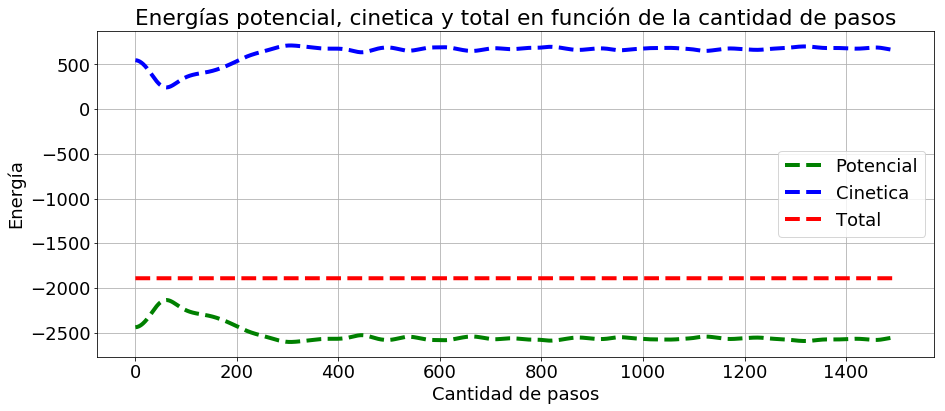

Fluctuacion potencial 13.616588904927859
Fluctuacion cinetica 13.61581079554666
Fluctuacion total 0.011498883085483887
Esto tardó 0.2850165367126465 segundos


In [15]:
t0 = time.time()

# Acá hago el punto 1a
# La tabla de datos son dos columnas, la primera es energía potencial, la segunda es Cinética

Datos = ldata("Datos/Datos_Energias_MD.txt")
#---------------------------------------------

Potencial = [float(fila[0]) for fila in Datos[1::]]
Cinetica = [float(fila[1]) for fila in Datos[1::]]
Total = [T+V for T,V in zip(Cinetica,Potencial)]

A = np.arange(0,len(Potencial))

plt.figure(figsize=(15,6))
plt.plot(A[0:1500],Potencial[0:1500],"g--",linewidth=4,label="Potencial")
plt.plot(A[0:1500],Cinetica[0:1500],"b--",linewidth=4,label="Cinetica")
plt.plot(A[0:1500],Total[0:1500],"r--",linewidth=4,label="Total")
plt.grid()
plt.rcParams.update({'font.size': 18})
plt.xlabel("Cantidad de pasos")
plt.ylabel("Energía")
plt.title("Energías potencial, cinetica y total en función de la cantidad de pasos")
plt.legend()
plt.show()
#-----------------------------------------------------------------------------------

# Totalmente innecesaria la correlación, por esta vez hacete el gil
# Datos = ldata("Datos/Correlacion_EnergiaP.txt")
# CorrP = [float(x) for x in Datos[0][0:len(Datos[0])-1]]
# Datos = ldata("Datos/Correlacion_EnergiaC.txt")
# CorrC = [float(x) for x in Datos[0][0:len(Datos[0])-1]]
# A = np.arange(0,len(CorrP))

# plt.figure(figsize=(15,6))
# plt.plot(A,CorrP,"g--",linewidth=4,label="Correlacion Potencial")
# plt.plot(A,CorrC,"b--",linewidth=4,label="Correlacion Cinetica")
# plt.grid()
# plt.rcParams.update({'font.size': 18})
# plt.xlabel("Cantidad de pasos")
# plt.ylabel("Energía")
# plt.title("Energías potencial, cinetica y total en función de la cantidad de pasos")
# plt.legend()
# plt.show()

#---------------------------------------------------------------------------------

# Acá le tomo desviación estandar a mis datos

Datos = ldata("Datos/Datos_Fluctuaciones_Energias_MD.txt")

Potencial = [float(fila[0]) for fila in Datos[1::]]
Cinetica = [float(fila[1]) for fila in Datos[1::]]
Total = [T+V for T,V in zip(Cinetica,Potencial)]

DP = np.std(np.array(Potencial))
DC = np.std(np.array(Cinetica))
DT = np.std(np.array(Total))

print("Fluctuacion potencial",DP)
print("Fluctuacion cinetica",DC)
print("Fluctuacion total",DT)


Tiempo()

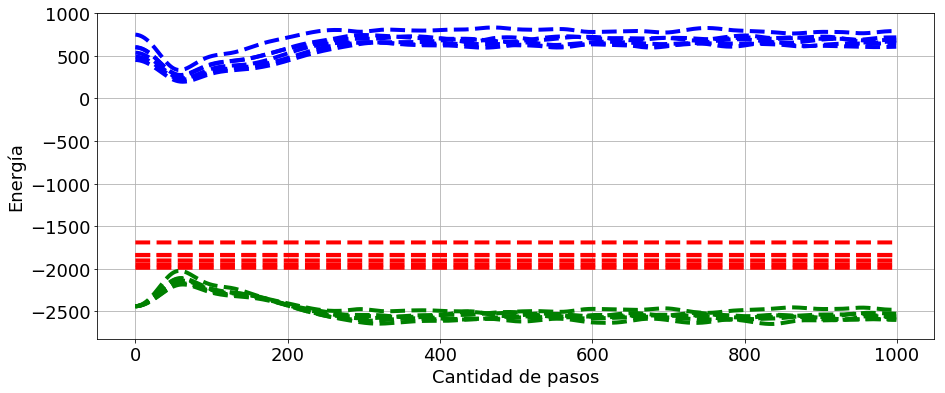

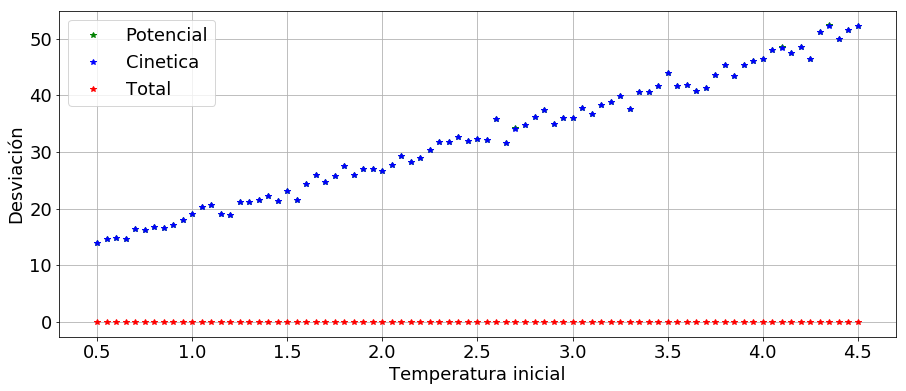

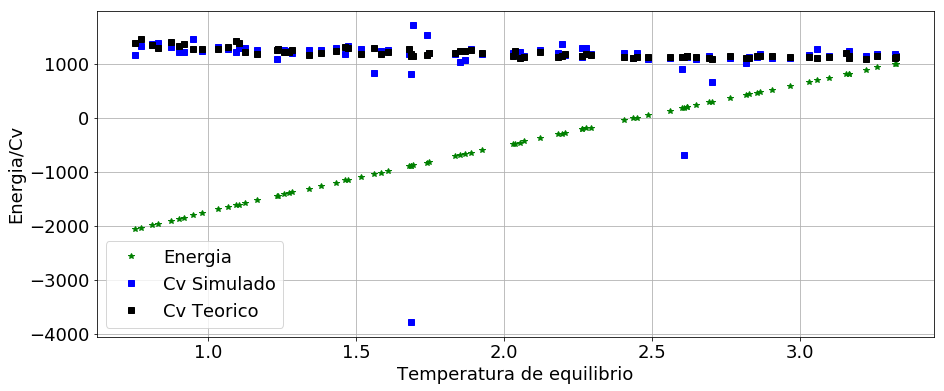

Esto tardó 1.3910794258117676 segundos


In [6]:
t0 = time.time()

# Acá voy a resolver el punto 1 c, Así que tengo que por un lado analizar las termalizaciones,
# Por otro, tengo que ver las fluctuaciones en función de la T de equilibrio

# Voy a empezar con las termalizaciones
# Los archivos tienen la pinta de "Datos_Termalizaciones_Energia_MD_T=$num$.txt"

CarpCheck=[[root,files] for root,dirs,files in os.walk("Punto1")]
Labarcdm1 = CarpCheck[0][1]

Termalizaciones = []

for label in Labarcdm1:
    dada = label.split("_")
    if(dada[1]=="Termalizaciones"):
        Termalizaciones.append(label)
        
Tgraficar = [0.6+i*0.04 for i in range(15)]
    
plt.figure(figsize=(15,6))
for label in Termalizaciones:
    dada = label.split("=")
    if(float(dada[1].strip(".txt")) in Tgraficar):
        Datos = ldata("Punto1/{}".format(label))
        
        Potencial = [float(fila[0]) for fila in Datos[1:len(Datos)-1]]
        Cinetica = [float(fila[1]) for fila in Datos[1:len(Datos)-1]]
        Total = [T+V for T,V in zip(Cinetica,Potencial)]

        A = np.arange(0,len(Potencial))
        fin = 1000

        plt.plot(A[0:fin],Potencial[0:fin],"g--",linewidth=4,label="Potencial")
        plt.plot(A[0:fin],Cinetica[0:fin],"b--",linewidth=4,label="Cinetica")
        plt.plot(A[0:fin],Total[0:fin],"r--",linewidth=4,label="Total")
plt.grid()
plt.rcParams.update({'font.size': 18})
plt.xlabel("Cantidad de pasos")
plt.ylabel("Energía")
# plt.title("Energías potencial, cinetica y total en función de la cantidad de pasos")
#     plt.legend()
plt.show()

#-------------------------------------------------------------------------------------

# Acá voy a ver las desviaciones de las mediciones una vez que termalizaron

Fluctuaciones = []

for label in Labarcdm1:
    dada = label.split("_")
    if(dada[1]=="Fluctuaciones"):
        Fluctuaciones.append(label)

Desviaciones = [["Temperatura","T equilibrio","Desviacion P","Desviacion C","Desviacion T"]]
for label in Fluctuaciones:
    Datos = ldata("Punto1/{}".format(label))
    
    Potencial = [float(fila[0]) for fila in Datos[1:len(Datos)-1]]
    Cinetica = [float(fila[1]) for fila in Datos[1:len(Datos)-1]]
    Total = [T+V for T,V in zip(Cinetica,Potencial)]
    Te = float(Datos[len(Datos)-1][0])
    dada = label.split("=")
    T = float(dada[1].strip(".txt"))
    DP = np.std(np.array(Potencial))
    DC = np.std(np.array(Cinetica))
    DT = np.std(np.array(Total))
    Desviaciones.append([T,Te,DP,DC,DT])

YP = [] # Desviaciones de energía potencial
YC = [] # Desviaciones de energía cinética
YT = [] # Desviaciones de Energía total
XT = [] # Temperaturas iniciales

for fila in Desviaciones[1::]:
    YP.append(fila[2])
    YC.append(fila[3])
    YT.append(fila[4])
    XT.append(fila[0])

plt.figure(figsize=(15,6))
plt.plot(XT,YP,"g*",linewidth=4,label="Potencial")
plt.plot(XT,YC,"b*",linewidth=4,label="Cinetica")
plt.plot(XT,YT,"r*",linewidth=4,label="Total")
plt.grid()
plt.rcParams.update({'font.size': 18})
plt.xlabel("Temperatura inicial")
plt.ylabel("Desviación")
# plt.title("Desviación en función de la Temperatura")
plt.legend()
plt.show()


#---------------------------------------------------------------------------------------
# Estaría bueno ver cuales T originales están asociadas a cuales T de equilibrio

# Correspondencias = []

# for label in Fluctuaciones:
#     dada = label.split("=")
#     T = dada[1].strip(".txt")
#     Datos = ldata("Punto1/{}".format(label))
#     Correspondencias.append([T,Datos[len(Datos)-1]])

# print(Correspondencias)

#---------------------------------------------------------------------------------------

# Veamos cúal es la tendencia de la Energía total en función de la temperatura

X=[]
Y=[]

for label in Fluctuaciones:
    Datos = ldata("Punto1/{}".format(label))
    
    Potencial = [float(fila[0]) for fila in Datos[1:len(Datos)-1]]
    Cinetica = [float(fila[1]) for fila in Datos[1:len(Datos)-1]]
    Total = [T+V for T,V in zip(Cinetica,Potencial)]
    Et = np.mean(np.array(Total))
    Te = float(Datos[len(Datos)-1][0])
    X.append(Te)
    Y.append(Et)
    
#------------------------------------------------------------------------------------
# Ahora veamos de calcular el CV para estos datos

Cv = []

for j in range(len(X)-1):
    Cv.append((Y[j+1]-Y[j])/(X[j+1]-X[j])) # Variación de la energía sobre variación de la T

N = 512

CvT = [] #Este va a ser el valor teórico para comparar

for label in Fluctuaciones:
    Datos = ldata("Punto1/{}".format(label))
    
    Cinetica = [float(fila[1]) for fila in Datos[1:len(Datos)-1]]
    INV = [1/x for x in Cinetica]
    PromCin = np.mean(np.array(INV))
    Te = float(Datos[len(Datos)-1][0])
    valor = N-N*Te*((3*N)/2-1)*PromCin
    CvT.append(N/valor)
#------------------------------------------------------------------------------------
    

plt.figure(figsize=(15,6))
plt.plot(X,Y,"g*",linewidth=4,label="Energia")
plt.plot(X[0:len(Cv)],Cv,"bs",linewidth=4,label="Cv Simulado")
plt.plot(X,CvT,"ks",linewidth=4,label="Cv Teorico")
plt.grid()
plt.rcParams.update({'font.size': 18})
plt.xlabel("Temperatura de equilibrio")
plt.ylabel("Energia/Cv")
# plt.title("Energia total en función de la Temperatura")
plt.legend()
plt.show()

Tiempo()

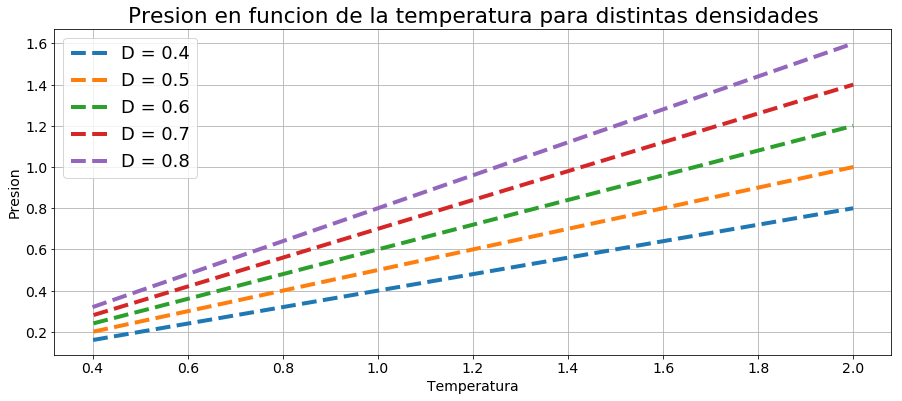

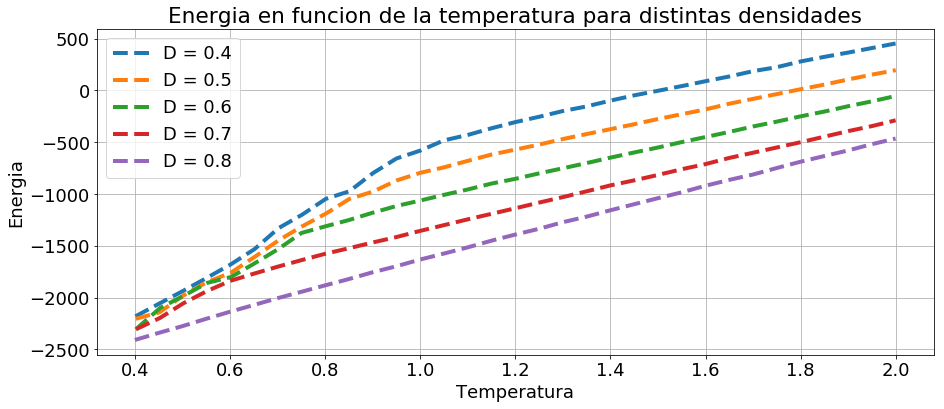

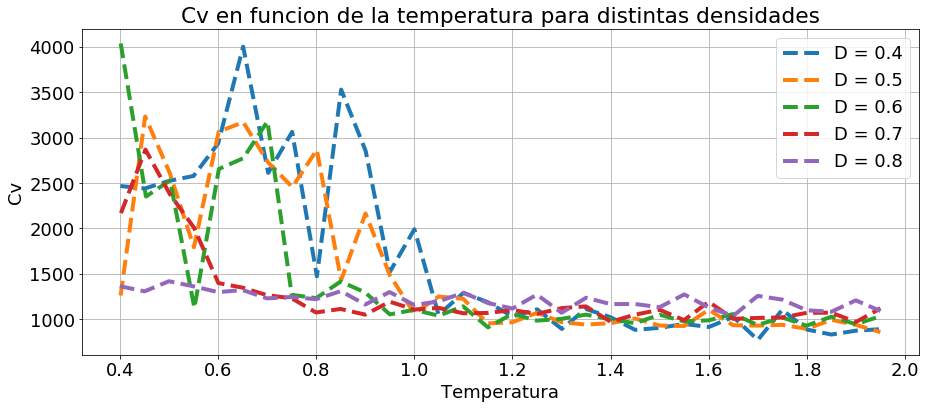

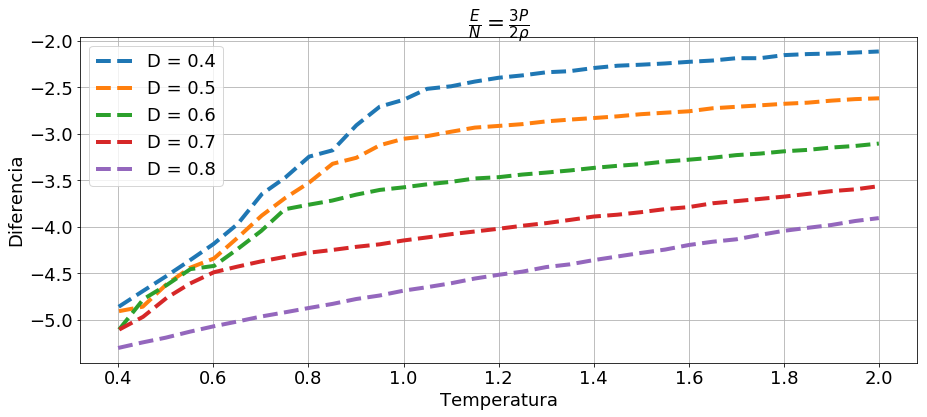

Esto tardó 1.198068380355835 segundos


In [9]:
t0 = time.time()

# Acá hago el mismo análisis de la energía y de la presión. En este caso
# Es 512 partículas con un barrido más fino en T y con mayor restricción en las T.

CarpCheck=[[root,files] for root,dirs,files in os.walk("Punto2N=512")]
Labarcdm2= CarpCheck[0][1]

# La verdad que hasta donde tengo entendido solo voy a armar 1 tipo de archivos
# Si calculé bien la presión, lo que queda es hacer un análisis de los datos en Python

plt.figure(figsize=(15,6))
for label in Labarcdm2:
    Datos = ldata("Punto2N=512/{}".format(label))
    
    Temperatura = [float(fila[0]) for fila in Datos[1::]]
    Energia = [float(fila[1]) for fila in Datos[1::]]
    Presion = [float(fila[2]) for fila in Datos[1::]]
    
    dada = label.split("=")
    D = float(dada[1].strip(".txt"))
    
    plt.plot(Temperatura,Presion,"--",linewidth=4,label="D = {}".format(D))
plt.grid()
plt.rcParams.update({'font.size': 18})
plt.xlabel("Temperatura")
plt.ylabel("Presion")
plt.title("Presion en funcion de la temperatura para distintas densidades")
plt.legend()
plt.show()


plt.figure(figsize=(15,6))
for label in Labarcdm2:
    Datos = ldata("Punto2N=512/{}".format(label))
    
    Temperatura = [float(fila[0]) for fila in Datos[1::]]
    Energia = [float(fila[1]) for fila in Datos[1::]]
    Presion = [float(fila[2]) for fila in Datos[1::]]
    
    dada = label.split("=")
    D = float(dada[1].strip(".txt"))
    
    plt.plot(Temperatura,Energia,"--",linewidth=4,label="D = {}".format(D))
plt.grid()
plt.rcParams.update({'font.size': 18})
plt.xlabel("Temperatura")
plt.ylabel("Energia")
plt.title("Energia en funcion de la temperatura para distintas densidades")
plt.legend()
plt.show()


# Ahora veamos de calcular el CV para estos datos
plt.figure(figsize=(15,6))
for label in Labarcdm2:
    Datos = ldata("Punto2N=512/{}".format(label))
    
    Temperatura = [float(fila[0]) for fila in Datos[1::]]
    Energia = [float(fila[1]) for fila in Datos[1::]]
    Presion = [float(fila[2]) for fila in Datos[1::]]

    dada = label.split("=")
    D = float(dada[1].strip(".txt"))
    
    Cv = []
    for j in range(len(Energia)-1):
        Cv.append((Energia[j+1]-Energia[j])/(Temperatura[j+1]-Temperatura[j])) # Variación de la energía sobre variación de la T
        
    plt.plot(Temperatura[0:len(Cv)],Cv,"--",linewidth=4,label="D = {}".format(D))
plt.grid()
plt.rcParams.update({'font.size': 18})
plt.xlabel("Temperatura")
plt.ylabel("Cv")
plt.title("Cv en funcion de la temperatura para distintas densidades")
plt.legend()
plt.show()
    
#----------------------------------------------------------------------------

# Solo por curiosidad queda comprobar lo que dijo Facundo de que realmente E/n = 3/2 (P/rho)

plt.figure(figsize=(15,6))
for label in Labarcdm2:
    Datos = ldata("Punto2N=512/{}".format(label))
    
    Temperatura = [float(fila[0]) for fila in Datos[1::]]
    Energia = [float(fila[1]) for fila in Datos[1::]]
    Presion = [float(fila[2]) for fila in Datos[1::]]
        
    dada = label.split("=")
    D = float(dada[1].strip(".txt"))
    N = 512
    
    Y = [(E/N)-(3/2)*(P/D) for E,P in zip (Energia,Presion)]
    
    plt.plot(Temperatura,Y,"--",linewidth=4,label="D = {}".format(D))
plt.grid()
plt.rcParams.update({'font.size': 18})
plt.xlabel("Temperatura")
plt.ylabel("Diferencia")
plt.title(r"$\frac{E}{N} =\frac{3P}{2\rho}$")
plt.legend()
plt.show()


Tiempo()

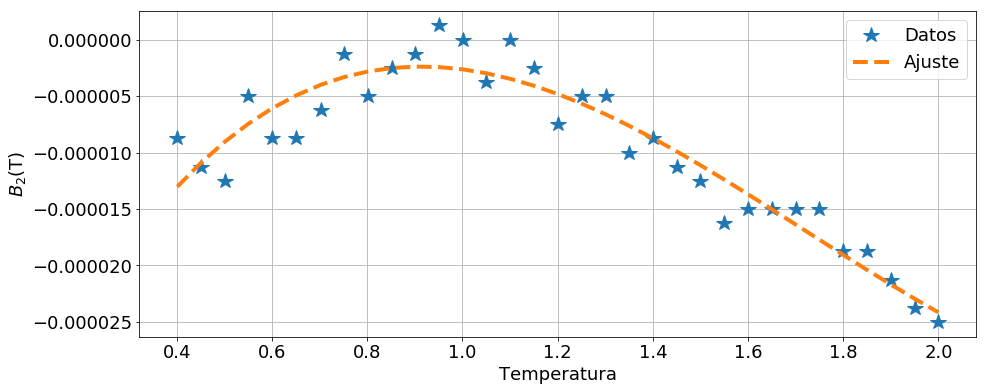

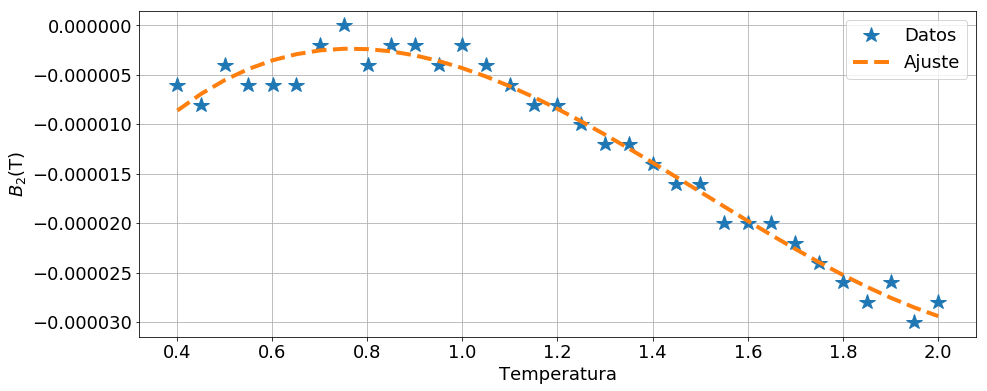

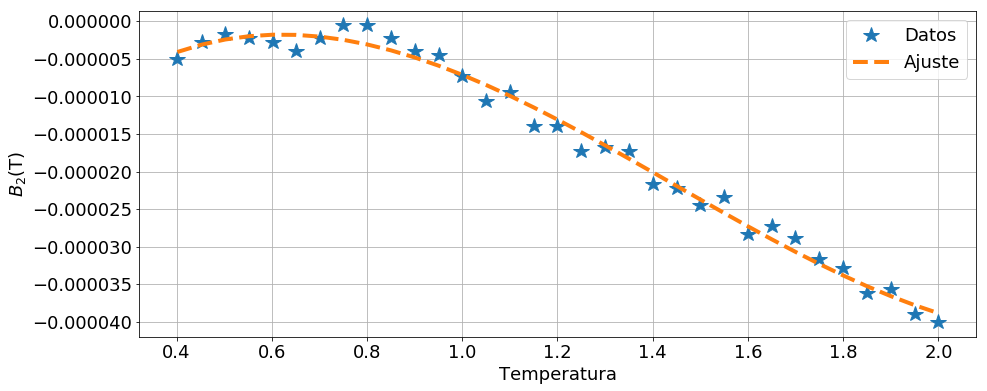

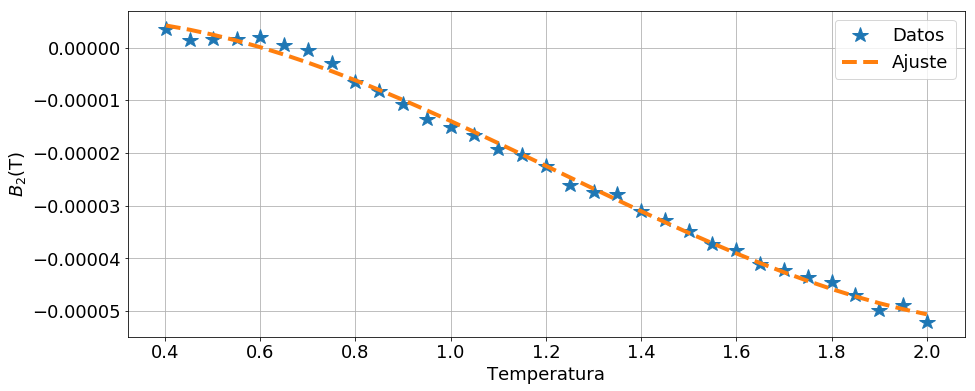

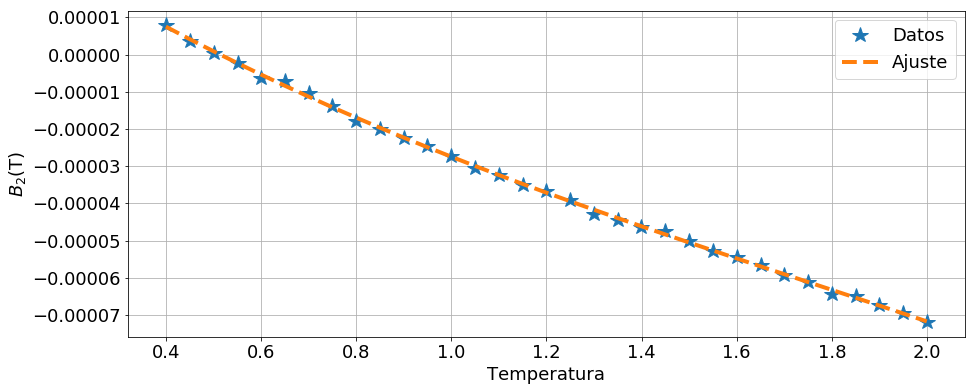

Para el ajuste de la densidad 0.4, el Chi cuadrado es 3.81842868692648e-07
Para el ajuste de la densidad 0.5, el Chi cuadrado es 2.396706810779834e-07
Para el ajuste de la densidad 0.6, el Chi cuadrado es 2.3875597232412134e-07
Para el ajuste de la densidad 0.7, el Chi cuadrado es 1.8763671396067816e-07
Para el ajuste de la densidad 0.8, el Chi cuadrado es 9.726459523910757e-08


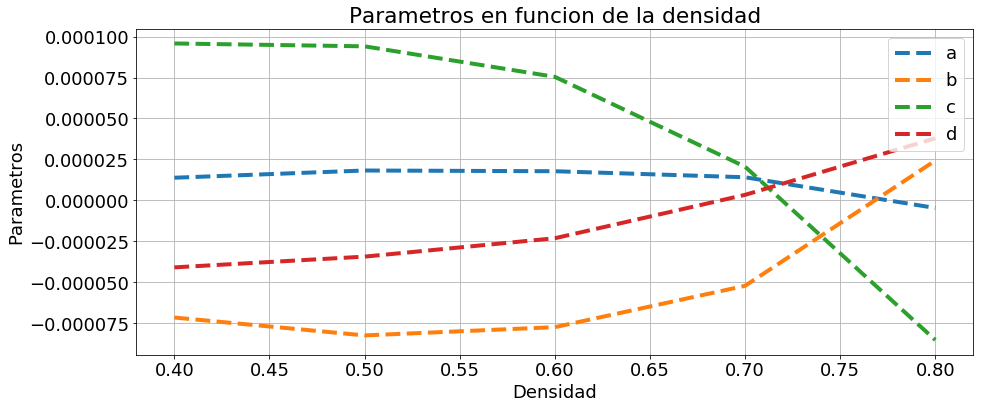

Esto tardó 1.317075490951538 segundos


In [19]:
t0 = time.time()

# Voy a separar acá la parte del B_2, porque se me está juntando todo

# Ahora tengo que armar el ajuste de los datos para hallar B_2(T)
# Acordate que Alpha(rho,T) = (P(rho,T)-rhoT)/rho^2 simeq B_2(T)
# Mis Y van a ser el Alpha. Y mis X van a estar dados por mi T.

#----------------------------------------------------------------------------------------
# Vamos a definir la función que voy a usar para ajustar

def P3(X,P):
    Y = P[0]*(X**3)+P[1]*(X**2)+P[2]*X+P[3]
    return Y
#---------------------------------------------------------------------------------------

DicP = dict()

for label in Labarcdm2:
    Datos = ldata("Punto2N=512/{}".format(label))
    
    Temperatura = [float(fila[0]) for fila in Datos[1::]]
    Energia = [float(fila[1]) for fila in Datos[1::]]
    Presion = [float(fila[2]) for fila in Datos[1::]]
        
    dada = label.split("=")
    D = float(dada[1].strip(".txt"))
    
    PreY = [(float(fila[2])-D*float(fila[0]))/(D**2) for fila in Datos[1::]]
    Y = np.array([[x] for x in PreY])
    X = np.array([[float(fila[0])**3,float(fila[0])**2,float(fila[0]),1] for fila in Datos[1::]])
    
    P = np.matmul(np.linalg.inv(np.matmul(np.transpose(X),X)),np.matmul(np.transpose(X),Y))
    DicP[D] = P
    
    plt.figure(figsize=(15,6))
    plt.plot(Temperatura,PreY,"*",markersize=16,label="Datos")
    plt.plot(Temperatura,P3(np.array(Temperatura),DicP[D]),"--",linewidth=4,label="Ajuste")
    plt.grid()
    plt.rcParams.update({'font.size': 18})
    plt.xlabel("Temperatura")
    plt.ylabel("$B_2$(T)")
#     plt.title("Termino $B_2$ del virial en funcion de T, densidad D = {}".format(D))
    plt.legend()
    plt.show()
#---------------------------------------------------------------------------------------------

# Habría que calcular los Chi cuadrado para mencionar que tan bueno o malo parece el ajuste
# Aunque Walter dice que el Chi Cuadrado no dice nada en realidad

for label in Labarcdm2:
    Datos = ldata("Punto2N=512/{}".format(label))
    
    Temperatura = [float(fila[0]) for fila in Datos[1::]]
    Energia = [float(fila[1]) for fila in Datos[1::]]
    Presion = [float(fila[2]) for fila in Datos[1::]]
        
    dada = label.split("=")
    D = float(dada[1].strip(".txt"))
    
    PreY = [(float(fila[2])-D*float(fila[0]))/(D**2) for fila in Datos[1::]]
    Y = np.array([[x] for x in PreY])
    X = np.array([[float(fila[0])**3,float(fila[0])**2,float(fila[0]),1] for fila in Datos[1::]])
    P = np.array([x for x in DicP[D]])
    
    C2 = np.linalg.norm(Y-np.matmul(X,P))/len(Y)
    
    print("Para el ajuste de la densidad {}, el Chi cuadrado es {}".format(D,C2))


#----------------------------------------------------------------------

Tablaparam = []

for tupla in DicP.items():
    fila = [tupla[0]]
    for x in tupla[1]:
        fila.append(x[0])
    Tablaparam.append(fila)

D = [float(fila[0]) for fila in Tablaparam]
a = [float(fila[1]) for fila in Tablaparam]
b = [float(fila[2]) for fila in Tablaparam]
c = [float(fila[3]) for fila in Tablaparam]
d = [float(fila[4]) for fila in Tablaparam]

plt.figure(figsize=(15,6))
plt.plot(D,a,"--",linewidth=4,label="a")
plt.plot(D,b,"--",linewidth=4,label="b")
plt.plot(D,c,"--",linewidth=4,label="c")
plt.plot(D,d,"--",linewidth=4,label="d")
plt.grid()
plt.rcParams.update({'font.size': 18})
plt.xlabel("Densidad")
plt.ylabel("Parametros")
plt.title("Parametros en funcion de la densidad")
plt.legend()
plt.show()


Tiempo()

In [18]:
for label in Labarcdm2:
    Datos = ldata("Punto2N=512/{}".format(label))
    
    Temperatura = [float(fila[0]) for fila in Datos[1::]]
    Energia = [float(fila[1]) for fila in Datos[1::]]
    Presion = [float(fila[2]) for fila in Datos[1::]]
        
    dada = label.split("=")
    D = float(dada[1].strip(".txt"))
    
    PreY = [(float(fila[2])-D*float(fila[0]))/(D**2) for fila in Datos[1::]]
    Y = np.array([[x] for x in PreY])
    X = np.array([[float(fila[0])**3,float(fila[0])**2,float(fila[0]),1] for fila in Datos[1::]])
    A = [x for x in DicP[D]]
    P = np.array(A)
    

print(len(Y))
print(P)

33
[[-4.58255059e-06]
 [ 2.43125316e-05]
 [-8.51238068e-05]
 [ 3.79286639e-05]]


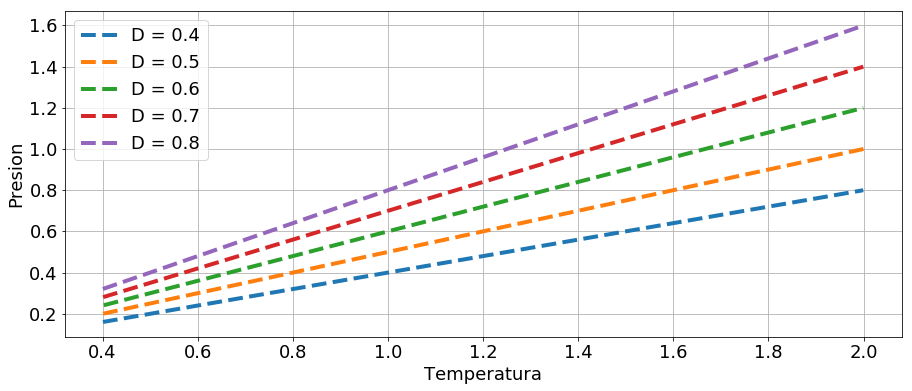

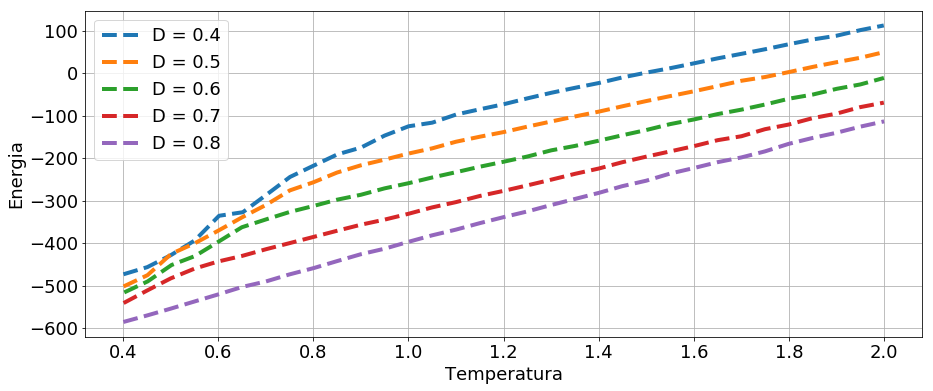

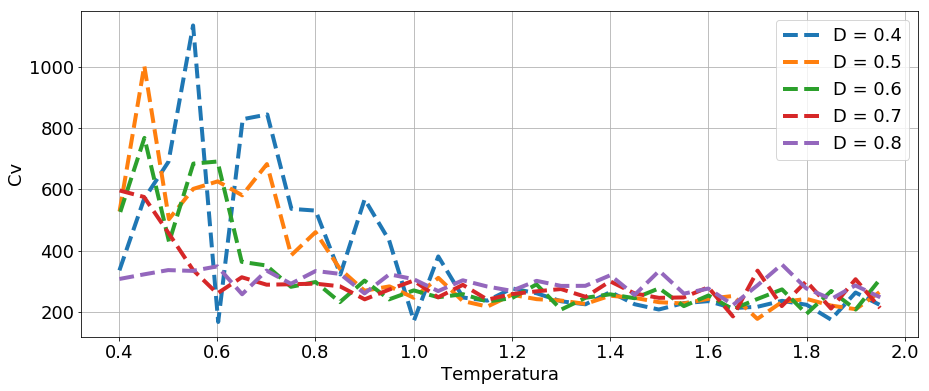

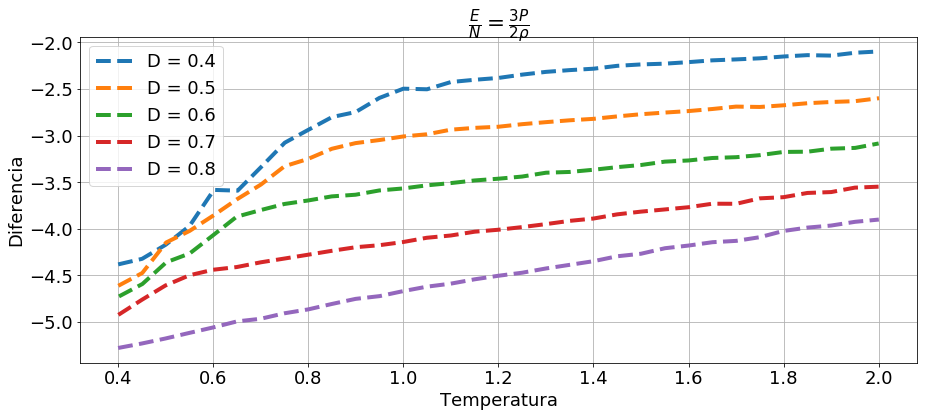

Esto tardó 0.8120462894439697 segundos


In [26]:
t0 = time.time()

# Acá hago el mismo análisis de la energía y de la presión. En este caso
# Es 125 partículas con un barrido más fino en T y con mayor restricción en las T.

CarpCheck=[[root,files] for root,dirs,files in os.walk("Punto2N=125")]
Labarcdm2= CarpCheck[0][1]

# La verdad que hasta donde tengo entendido solo voy a armar 1 tipo de archivos
# Si calculé bien la presión, lo que queda es hacer un análisis de los datos en Python

plt.figure(figsize=(15,6))
for label in Labarcdm2:
    Datos = ldata("Punto2N=125/{}".format(label))
    
    Temperatura = [float(fila[0]) for fila in Datos[1::]]
    Energia = [float(fila[1]) for fila in Datos[1::]]
    Presion = [float(fila[2]) for fila in Datos[1::]]
    
    dada = label.split("=")
    D = float(dada[1].strip(".txt"))
    
    plt.plot(Temperatura,Presion,"--",linewidth=4,label="D = {}".format(D))
plt.grid()
plt.rcParams.update({'font.size': 18})
plt.xlabel("Temperatura")
plt.ylabel("Presion")
# plt.title("Presion en funcion de la temperatura para distintas densidades")
plt.legend()
plt.show()


plt.figure(figsize=(15,6))
for label in Labarcdm2:
    Datos = ldata("Punto2N=125/{}".format(label))
    
    Temperatura = [float(fila[0]) for fila in Datos[1::]]
    Energia = [float(fila[1]) for fila in Datos[1::]]
    Presion = [float(fila[2]) for fila in Datos[1::]]
    
    dada = label.split("=")
    D = float(dada[1].strip(".txt"))
    
    plt.plot(Temperatura,Energia,"--",linewidth=4,label="D = {}".format(D))
plt.grid()
plt.rcParams.update({'font.size': 18})
plt.xlabel("Temperatura")
plt.ylabel("Energia")
# plt.title("Energia en funcion de la temperatura para distintas densidades")
plt.legend()
plt.show()


# Ahora veamos de calcular el CV para estos datos
plt.figure(figsize=(15,6))
for label in Labarcdm2:
    Datos = ldata("Punto2N=125/{}".format(label))
    
    Temperatura = [float(fila[0]) for fila in Datos[1::]]
    Energia = [float(fila[1]) for fila in Datos[1::]]
    Presion = [float(fila[2]) for fila in Datos[1::]]

    dada = label.split("=")
    D = float(dada[1].strip(".txt"))
    
    Cv = []
    for j in range(len(Energia)-1):
        Cv.append((Energia[j+1]-Energia[j])/(Temperatura[j+1]-Temperatura[j])) # Variación de la energía sobre variación de la T
        
    plt.plot(Temperatura[0:len(Cv)],Cv,"--",linewidth=4,label="D = {}".format(D))
plt.grid()
plt.rcParams.update({'font.size': 18})
plt.xlabel("Temperatura")
plt.ylabel("Cv")
# plt.title("Cv en funcion de la temperatura para distintas densidades")
plt.legend()
plt.show()
    
#----------------------------------------------------------------------------

# Solo por curiosidad queda comprobar lo que dijo Facundo de que realmente E/n = 3/2 (P/rho)

plt.figure(figsize=(15,6))
for label in Labarcdm2:
    Datos = ldata("Punto2N=125/{}".format(label))
    
    Temperatura = [float(fila[0]) for fila in Datos[1::]]
    Energia = [float(fila[1]) for fila in Datos[1::]]
    Presion = [float(fila[2]) for fila in Datos[1::]]
        
    dada = label.split("=")
    D = float(dada[1].strip(".txt"))
    N = 125
    
    Y = [(E/N)-(3/2)*(P/D) for E,P in zip (Energia,Presion)]
    
    plt.plot(Temperatura,Y,"--",linewidth=4,label="D = {}".format(D))
plt.grid()
plt.rcParams.update({'font.size': 18})
plt.xlabel("Temperatura")
plt.ylabel("Diferencia")
plt.title(r"$\frac{E}{N} =\frac{3P}{2\rho}$")
plt.legend()
plt.show()


Tiempo()

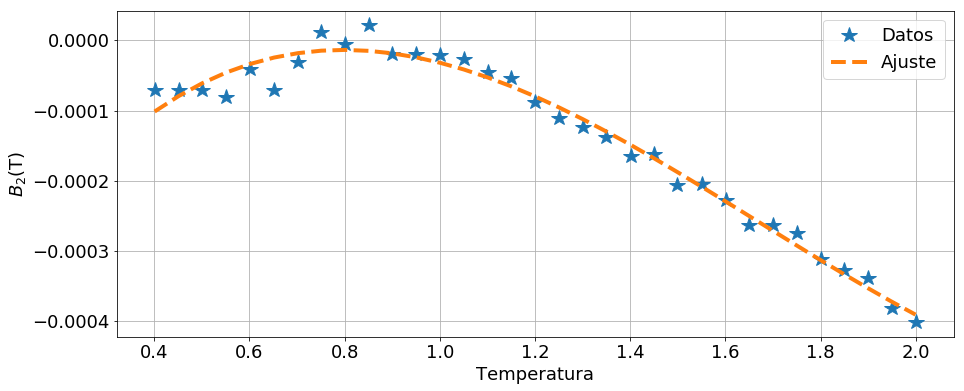

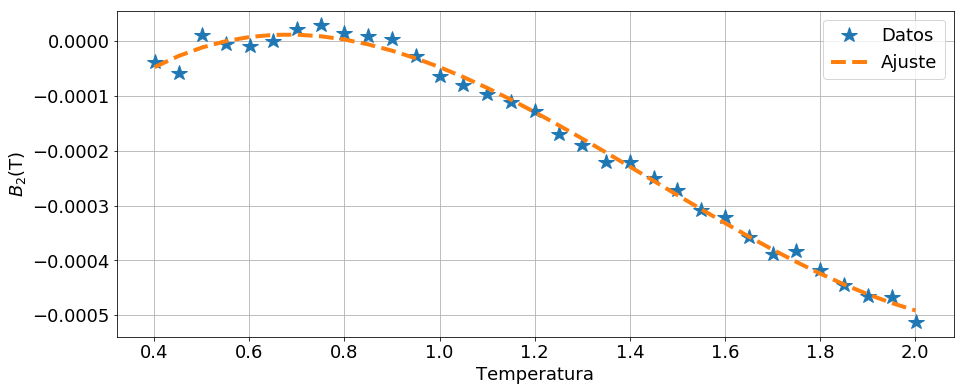

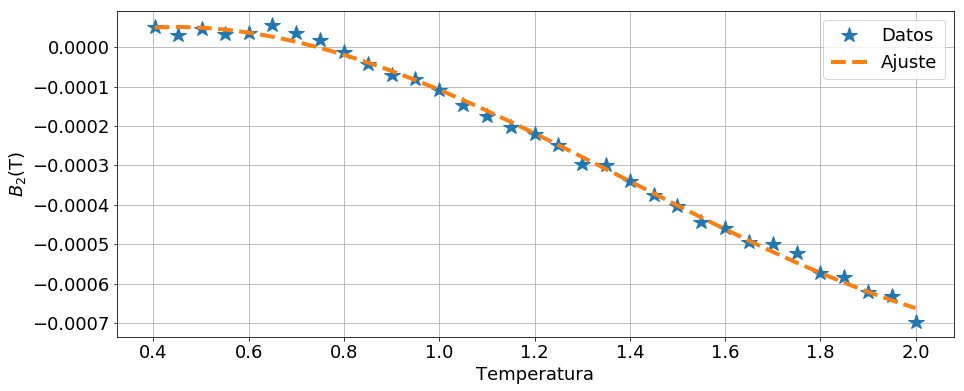

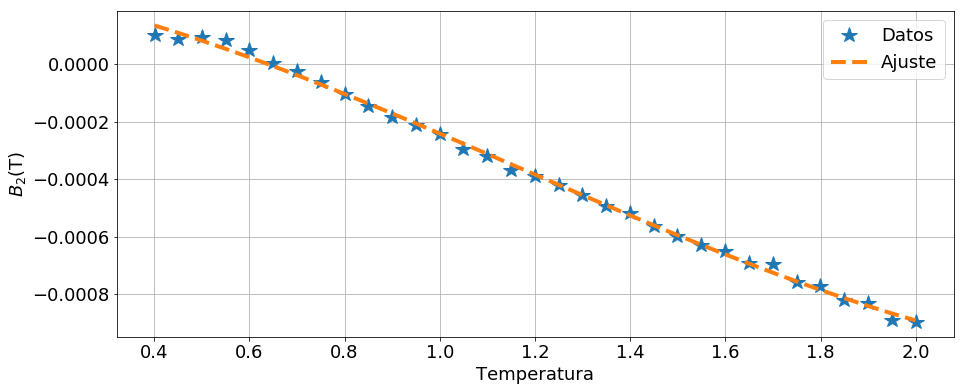

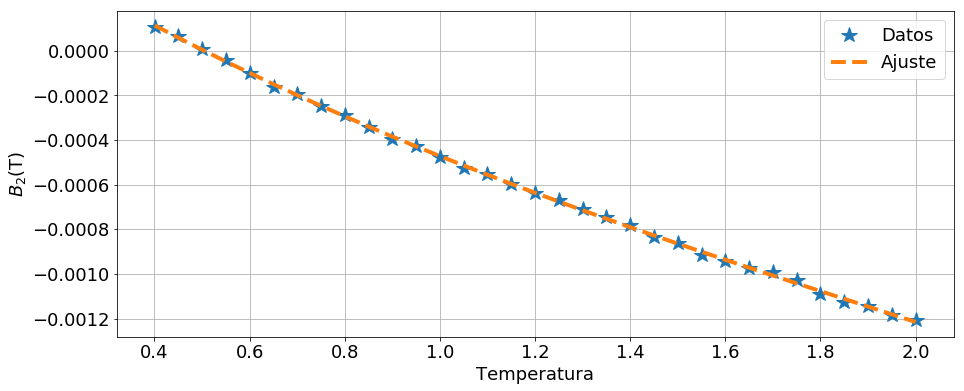

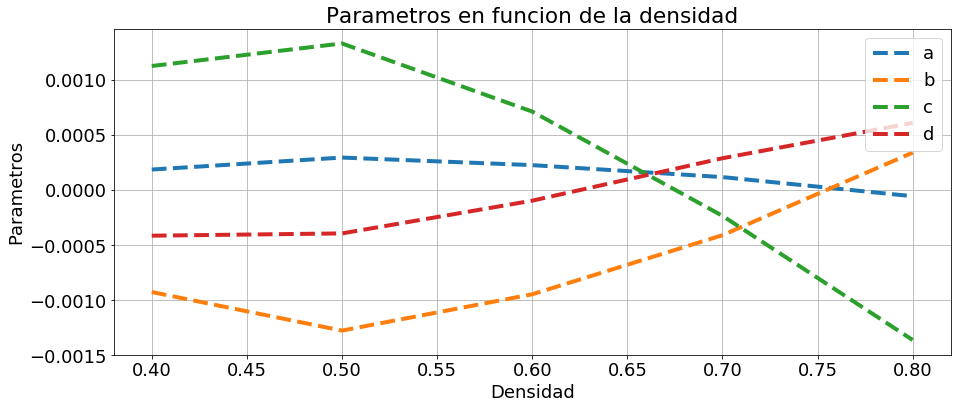

Esto tardó 1.2560715675354004 segundos


In [27]:
t0 = time.time()

# Voy a separar acá la parte del B_2, porque se me está juntando todo

# Ahora tengo que armar el ajuste de los datos para hallar B_2(T)
# Acordate que Alpha(rho,T) = (P(rho,T)-rhoT)/rho^2 simeq B_2(T)
# Mis Y van a ser el Alpha. Y mis X van a estar dados por mi T.

#----------------------------------------------------------------------------------------
# Vamos a definir la función que voy a usar para ajustar

def P3(X,P):
    Y = P[0]*(X**3)+P[1]*(X**2)+P[2]*X+P[3]
    return Y
#---------------------------------------------------------------------------------------

DicP = dict()

for label in Labarcdm2:
    Datos = ldata("Punto2N=125/{}".format(label))
    
    Temperatura = [float(fila[0]) for fila in Datos[1::]]
    Energia = [float(fila[1]) for fila in Datos[1::]]
    Presion = [float(fila[2]) for fila in Datos[1::]]
        
    dada = label.split("=")
    D = float(dada[1].strip(".txt"))
    
    PreY = [(float(fila[2])-D*float(fila[0]))/(D**2) for fila in Datos[1::]]
    Y = np.array([[x] for x in PreY])
    X = np.array([[float(fila[0])**3,float(fila[0])**2,float(fila[0]),1] for fila in Datos[1::]])
    
    P = np.matmul(np.linalg.inv(np.matmul(np.transpose(X),X)),np.matmul(np.transpose(X),Y))
    DicP[D] = P
    
    plt.figure(figsize=(15,6))
    plt.plot(Temperatura,PreY,"*",markersize=16,label="Datos")
    plt.plot(Temperatura,P3(np.array(Temperatura),DicP[D]),"--",linewidth=4,label="Ajuste")
    plt.grid()
    plt.rcParams.update({'font.size': 18})
    plt.xlabel("Temperatura")
    plt.ylabel("$B_2$(T)")
#     plt.title("Termino $B_2$ del virial en funcion de T, densidad D = {}".format(D))
    plt.legend()
    plt.show()
#---------------------------------------------------------------------------------------------

#----------------------------------------------------------------------

Tablaparam = []

for tupla in DicP.items():
    fila = [tupla[0]]
    for x in tupla[1]:
        fila.append(x[0])
    Tablaparam.append(fila)

D = [float(fila[0]) for fila in Tablaparam]
a = [float(fila[1]) for fila in Tablaparam]
b = [float(fila[2]) for fila in Tablaparam]
c = [float(fila[3]) for fila in Tablaparam]
d = [float(fila[4]) for fila in Tablaparam]

plt.figure(figsize=(15,6))
plt.plot(D,a,"--",linewidth=4,label="a")
plt.plot(D,b,"--",linewidth=4,label="b")
plt.plot(D,c,"--",linewidth=4,label="c")
plt.plot(D,d,"--",linewidth=4,label="d")
plt.grid()
plt.rcParams.update({'font.size': 18})
plt.xlabel("Densidad")
plt.ylabel("Parametros")
plt.title("Parametros en funcion de la densidad")
plt.legend()
plt.show()


Tiempo()

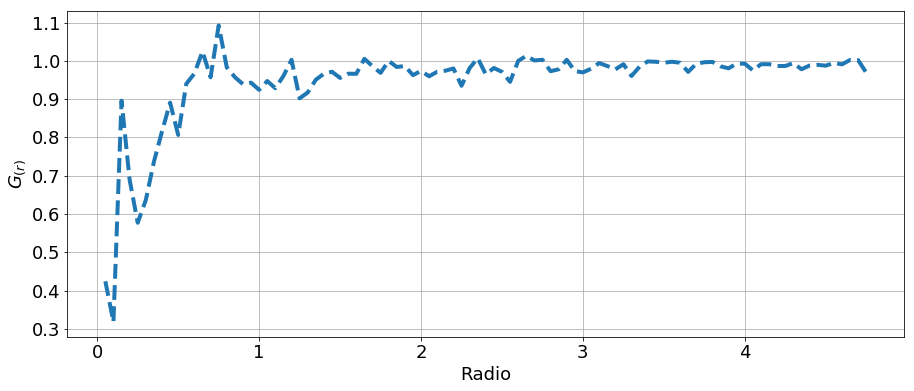

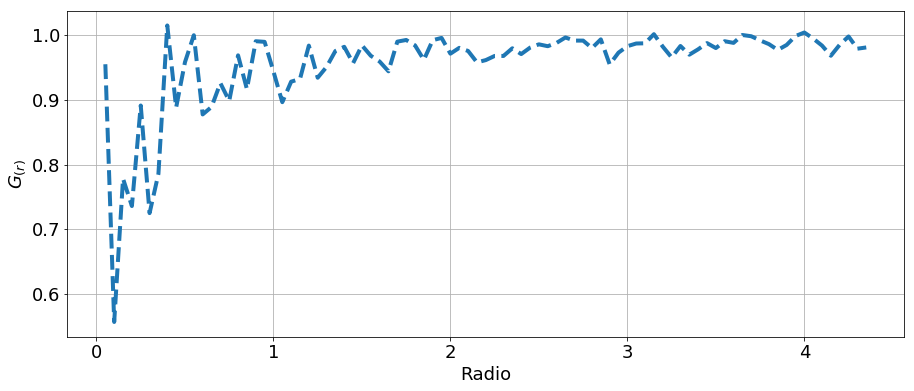

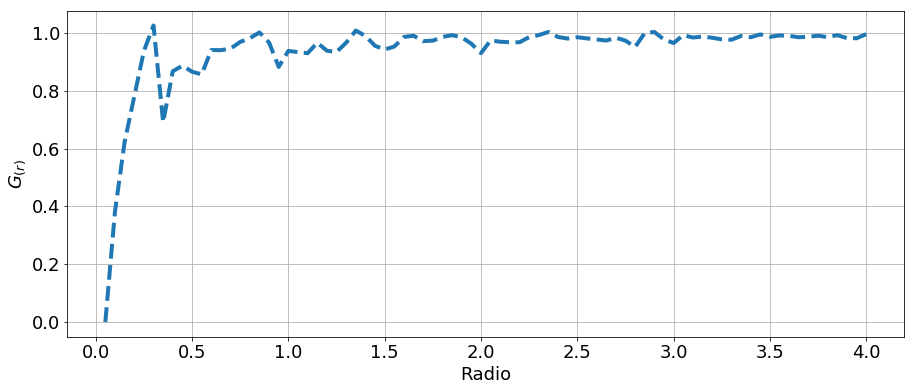

Esto tardó 0.5620322227478027 segundos


In [4]:
t0 = time.time()

# Acá tengo que graficar la función de distribución radial

CarpCheck=[[root,files] for root,dirs,files in os.walk("Punto3")]
Labarcdm3= CarpCheck[0][1]

# # Los archivos tienen la pinta de "Datos_gr_D=$num$.txt"

for label in Labarcdm3:
    if(len(label.split("_"))==3):
        Datos = ldata("Punto3/{}".format(label))
        
        N=512
        dada = label.split("=")
        D = float(dada[1].strip(".txt"))

        R = [float(fila[0]) for fila in Datos[1::]]
        Gr = [float(fila[1])*(N/(2*D)) for fila in Datos[1::]]

        plt.figure(figsize=(15,6))
        plt.plot(R,Gr,"--",linewidth=4)
        plt.grid()
        plt.rcParams.update({'font.size': 18})
        plt.xlabel("Radio")
        plt.ylabel("$G_{(r)}$")
#         plt.title("Distribución de densidad en función del radio, densidad = {}".format(D))
    #     plt.legend()
        plt.show()
    
#---------------------------------------------------------------------------

# Vamos a ver si la función está viendo cosas raras o si es la temperatura

# Temp = []
# for label in Labarcdm3:
#     dada = label.split("_")
#     if(dada[1]=="especial"):
#         Datos = ldata("Punto3/{}".format(label))
#         for fila in Datos[1::]:
#             if(float(fila[2]) not in Temp):
#                 Temp.append(float(fila[2]))


# plt.figure(figsize=(15,6))
# for T in Temp:
#     R = []
#     Gr = []
#     for fila in Datos[1::]:
#         if float(fila[2])==T:
#             R.append(float(fila[0]))
#             Gr.append(float(fila[1]))
#     plt.plot(R,Gr,"--",linewidth=4,label="T = {}".format(T))
# plt.grid()
# plt.rcParams.update({'font.size': 18})
# plt.xlabel("Radio")
# plt.ylabel("$G_{(r)}$")
# plt.title("Distribución de densidad en función del radio")
# plt.legend()
# plt.show()


Tiempo()

Sistema al final del proceso, D = 0.6
Sistema al final del proceso, D = 0.8
Sistema al final del proceso, D = 1.0
Esto tardó 0.07100415229797363 segundos


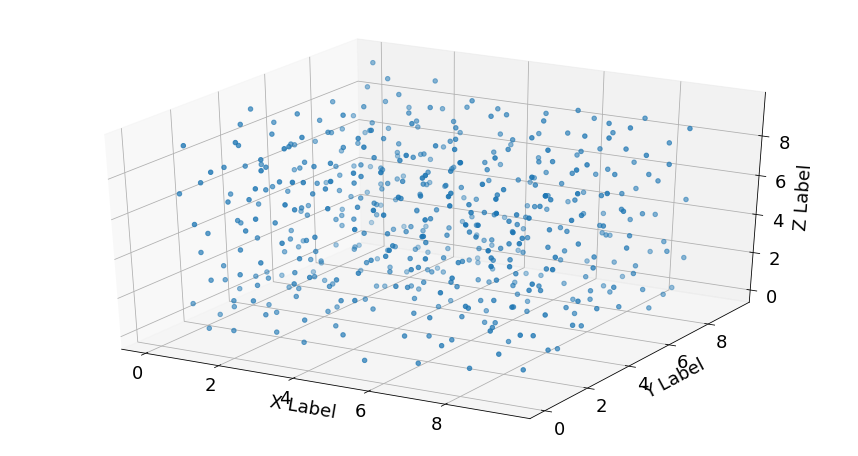

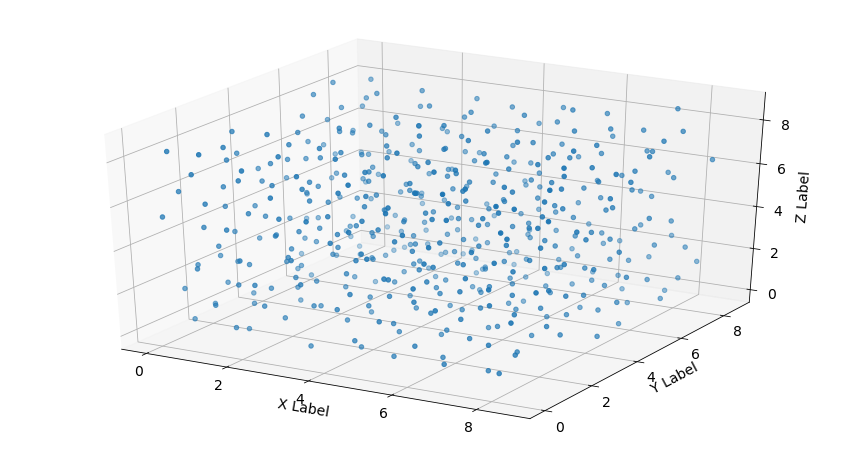

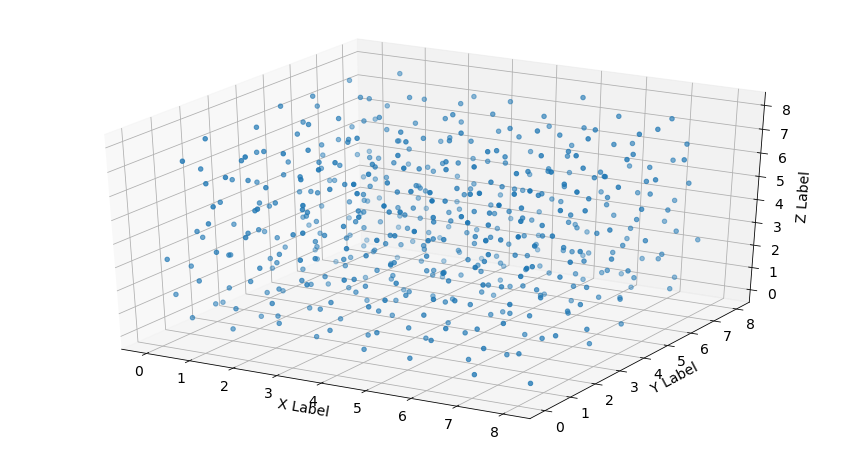

In [24]:
t0 = time.time()

# Acá voy a mirar cómo quedó el sistema al final de cada uno de los procesos
CarpCheck=[[root,files] for root,dirs,files in os.walk("Punto3")]
Labarcdm3= CarpCheck[0][1]

# # Los archivos tienen la pinta de "Datos_posicion_gr_D=$num$.txt"

for label in Labarcdm3:
    dada = label.split("_")
    if(dada[1]=="posicion"):
        Datos = ldata("Punto3/{}".format(label))

        X = [float(fila[0]) for fila in Datos[1::]]
        Y = [float(fila[1]) for fila in Datos[1::]]
        Z = [float(fila[2]) for fila in Datos[1::]]

        dada = label.split("=")
        D = float(dada[1].strip(".txt"))
        
        print("Sistema al final del proceso, D = {}".format(D))

        fig = plt.figure(figsize = (15,8) )
        ax = fig.add_subplot(111, projection='3d')
        plt.rcParams.update({'font.size': 14})
        ax.scatter(X, Y, Z)
        ax.set_xlabel('X Label')
        ax.set_ylabel('Y Label')
        ax.set_zlabel('Z Label')



Tiempo()

In [24]:
for num in Tgraficar:
    for label in Termalizaciones:
        dada = label.split("=")
        T = float(dada[1].strip(".txt"))
        if(num==T):
            print(num)
#     if(float(dada[1].strip(".txt")) in Tgraficar):
#         print(label)

0.6
0.64
0.68
